# 1. 라이브러리 준비 및 데이터 불러오기

In [129]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='time'>

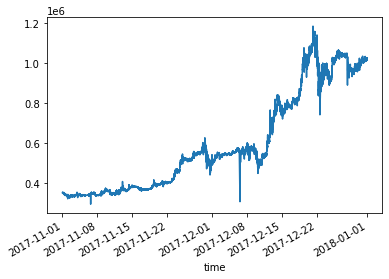

In [130]:
DATA_PATH = '/aiffel/aiffel/fnguide/data/'
modify_data = pd.read_csv(os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()

<AxesSubplot:xlabel='time'>

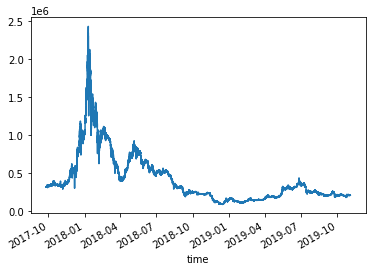

In [131]:
modify_data.loc[:,'close'].plot()

# 2. Data Labeling

### 2-1. Price Change Direction

In [132]:
modify_data

,open,high,low,close,volume
time,,,,,
2017-09-25 03:00:00,324500,325500,322000,324000,52.477251
2017-09-25 03:01:00,324000,324000,322500,324000,39.061889
2017-09-25 03:02:00,322500,324500,322500,324500,12.794000
2017-09-25 03:05:00,324000,324000,323000,324000,33.365246
2017-09-25 03:06:00,324000,325000,322500,324000,46.224544
...,...,...,...,...,...
2019-11-03 10:29:00,212650,212800,212600,212800,30.996276
2019-11-03 10:30:00,212800,212800,212600,212600,3.224132
2019-11-03 10:31:00,212600,212600,212400,212400,135.351681


In [22]:
modify_data.index

DatetimeIndex(['2017-09-25 03:00:00', '2017-09-25 03:01:00',
               '2017-09-25 03:02:00', '2017-09-25 03:05:00',
               '2017-09-25 03:06:00', '2017-09-25 03:07:00',
               '2017-09-25 03:10:00', '2017-09-25 03:11:00',
               '2017-09-25 03:12:00', '2017-09-25 03:15:00',
               ...
               '2019-11-03 10:24:00', '2019-11-03 10:25:00',
               '2019-11-03 10:26:00', '2019-11-03 10:27:00',
               '2019-11-03 10:28:00', '2019-11-03 10:29:00',
               '2019-11-03 10:30:00', '2019-11-03 10:31:00',
               '2019-11-03 10:32:00', '2019-11-03 10:33:00'],
              dtype='datetime64[ns]', name='time', length=1000000, freq=None)

In [23]:
modify_data.loc['2017-11-01']

,open,high,low,close,volume
time,,,,,
2017-11-01 00:05:00,350000,350000,350000,350000,0.01
2017-11-01 00:12:00,351500,351500,351500,351500,0.01
2017-11-01 00:18:00,352500,352500,352500,352500,0.01
2017-11-01 00:24:00,351000,351000,351000,351000,0.01
2017-11-01 00:31:00,350000,350000,350000,350000,0.01
...,...,...,...,...,...
2017-11-01 23:30:00,331500,331500,331500,331500,0.01
2017-11-01 23:36:00,331500,331500,331500,331500,0.01
2017-11-01 23:43:00,328500,328500,328500,328500,0.01


In [5]:
modify_data['close']

time
2017-09-25 03:00:00    324000
2017-09-25 03:01:00    324000
2017-09-25 03:02:00    324500
2017-09-25 03:05:00    324000
2017-09-25 03:06:00    324000
                        ...  
2019-11-03 10:29:00    212800
2019-11-03 10:30:00    212600
2019-11-03 10:31:00    212400
2019-11-03 10:32:00    212500
2019-11-03 10:33:00    212350
Name: close, Length: 1000000, dtype: int64

In [6]:
modify_data['close'].shift(3)

time
2017-09-25 03:00:00         NaN
2017-09-25 03:01:00         NaN
2017-09-25 03:02:00         NaN
2017-09-25 03:05:00    324000.0
2017-09-25 03:06:00    324000.0
                         ...   
2019-11-03 10:29:00    212700.0
2019-11-03 10:30:00    212750.0
2019-11-03 10:31:00    212800.0
2019-11-03 10:32:00    212800.0
2019-11-03 10:33:00    212600.0
Name: close, Length: 1000000, dtype: float64

In [135]:
modify_data['close'] - modify_data['close'].shift(1)

time
2017-09-25 03:00:00      NaN
2017-09-25 03:01:00      0.0
2017-09-25 03:02:00    500.0
2017-09-25 03:05:00   -500.0
2017-09-25 03:06:00      0.0
                       ...  
2019-11-03 10:29:00      0.0
2019-11-03 10:30:00   -200.0
2019-11-03 10:31:00   -200.0
2019-11-03 10:32:00    100.0
2019-11-03 10:33:00   -150.0
Name: close, Length: 1000000, dtype: float64

In [141]:
window = 10
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1)
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

In [142]:
momentum_signal

time
2017-09-25 03:00:00    NaN
2017-09-25 03:01:00    NaN
2017-09-25 03:02:00    NaN
2017-09-25 03:05:00    NaN
2017-09-25 03:06:00    NaN
                      ... 
2019-11-03 10:29:00    1.0
2019-11-03 10:30:00    0.0
2019-11-03 10:31:00    0.0
2019-11-03 10:32:00    0.0
2019-11-03 10:33:00    0.0
Name: close, Length: 1000000, dtype: float64

In [143]:
s_momentum_signal

time
2017-09-25 03:00:00    NaN
2017-09-25 03:01:00    NaN
2017-09-25 03:02:00    NaN
2017-09-25 03:05:00    NaN
2017-09-25 03:06:00    NaN
                      ... 
2019-11-03 10:29:00    1.0
2019-11-03 10:30:00    0.0
2019-11-03 10:31:00    0.0
2019-11-03 10:32:00    0.0
2019-11-03 10:33:00    0.0
Name: close, Length: 1000000, dtype: float64

In [9]:
s_momentum_signal.loc['2017-11-21']

time
2017-11-21 00:00:00    0.0
2017-11-21 00:01:00    0.0
2017-11-21 00:02:00    0.0
2017-11-21 00:03:00    0.0
2017-11-21 00:04:00    0.0
                      ... 
2017-11-21 23:55:00    0.0
2017-11-21 23:56:00    0.0
2017-11-21 23:57:00    0.0
2017-11-21 23:58:00    0.0
2017-11-21 23:59:00    0.0
Name: close, Length: 1301, dtype: float64

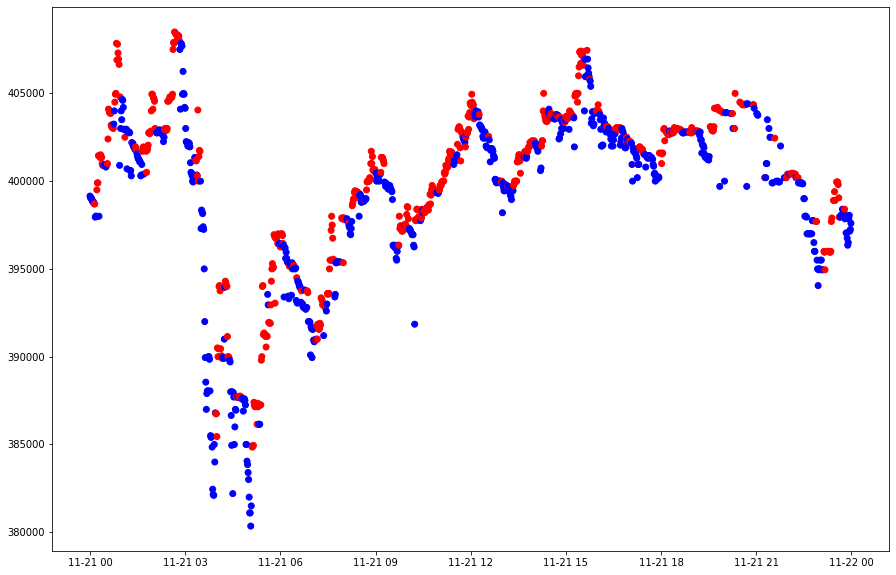

In [144]:
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = s_momentum_signal.loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

plt.figure(figsize=(15,10))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

### 2-2. Using Moving Average

In [12]:
modify_data['close']

time
2017-09-25 03:00:00    324000
2017-09-25 03:01:00    324000
2017-09-25 03:02:00    324500
2017-09-25 03:05:00    324000
2017-09-25 03:06:00    324000
                        ...  
2019-11-03 10:29:00    212800
2019-11-03 10:30:00    212600
2019-11-03 10:31:00    212400
2019-11-03 10:32:00    212500
2019-11-03 10:33:00    212350
Name: close, Length: 1000000, dtype: int64

In [17]:
modify_data['close'].rolling(3).sum()

time
2017-09-25 03:00:00         NaN
2017-09-25 03:01:00         NaN
2017-09-25 03:02:00    972500.0
2017-09-25 03:05:00    972500.0
2017-09-25 03:06:00    972500.0
                         ...   
2019-11-03 10:29:00    638350.0
2019-11-03 10:30:00    638200.0
2019-11-03 10:31:00    637800.0
2019-11-03 10:32:00    637500.0
2019-11-03 10:33:00    637250.0
Name: close, Length: 1000000, dtype: float64

In [145]:
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1)
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

In [146]:
s_momentum_signal

time
2017-09-25 03:00:00    NaN
2017-09-25 03:01:00    NaN
2017-09-25 03:02:00    NaN
2017-09-25 03:05:00    NaN
2017-09-25 03:06:00    NaN
                      ... 
2019-11-03 10:29:00    0.0
2019-11-03 10:30:00    0.0
2019-11-03 10:31:00    0.0
2019-11-03 10:32:00    0.0
2019-11-03 10:33:00    0.0
Name: close, Length: 1000000, dtype: float64

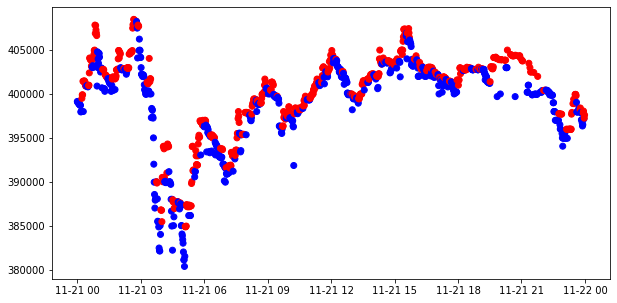

In [147]:
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = s_momentum_signal.loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

### 2-3. Local Min-Max

In [148]:
sub_data

time
2017-11-21 00:00:00    399150
2017-11-21 00:01:00    399050
2017-11-21 00:02:00    399050
2017-11-21 00:03:00    399000
2017-11-21 00:04:00    398900
                        ...  
2017-11-21 23:55:00    397850
2017-11-21 23:56:00    398050
2017-11-21 23:57:00    397150
2017-11-21 23:58:00    397250
2017-11-21 23:59:00    397600
Name: close, Length: 1301, dtype: int64

In [27]:
sub_data.iloc[0]

399150

In [30]:
sub_data.index[1:]

DatetimeIndex(['2017-11-21 00:01:00', '2017-11-21 00:02:00',
               '2017-11-21 00:03:00', '2017-11-21 00:04:00',
               '2017-11-21 00:05:00', '2017-11-21 00:06:00',
               '2017-11-21 00:07:00', '2017-11-21 00:08:00',
               '2017-11-21 00:09:00', '2017-11-21 00:10:00',
               ...
               '2017-11-21 23:50:00', '2017-11-21 23:51:00',
               '2017-11-21 23:52:00', '2017-11-21 23:53:00',
               '2017-11-21 23:54:00', '2017-11-21 23:55:00',
               '2017-11-21 23:56:00', '2017-11-21 23:57:00',
               '2017-11-21 23:58:00', '2017-11-21 23:59:00'],
              dtype='datetime64[ns]', name='time', length=1300, freq=None)

In [31]:
sub_data.values[1:]

array([399050, 399050, 399000, ..., 397150, 397250, 397600])

In [151]:
if not False:
    print('ggg')

ggg


In [152]:
# Local min / max 를 추출하기 위한 함수
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    max_value = close.iloc[0]
    n_cnt_min, n_cnt_max = 0, 0
    
    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False
    
    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True
        if val > max_value:
            max_value = val
            maxes.append(max_value)
            max_idxes.append(idx)
            n_cnt_max = 0
            b_max_update = True
        
        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0
    
        if not b_min_update:
            b_max_update = False
            n_cnt_max += 1
            if n_cnt_max >= wait:
                min_value = max_value
                n_cnt_max = 0
               
    return pd.DataFrame.from_dict({'min_time': min_idxes, 'local_min': mins}), pd.DataFrame.from_dict({'max_time': max_idxes, 'local_max': maxes})

In [172]:
mins, maxes = get_local_min_max(sub_data, wait=10)

(376546.5, 412585.0)

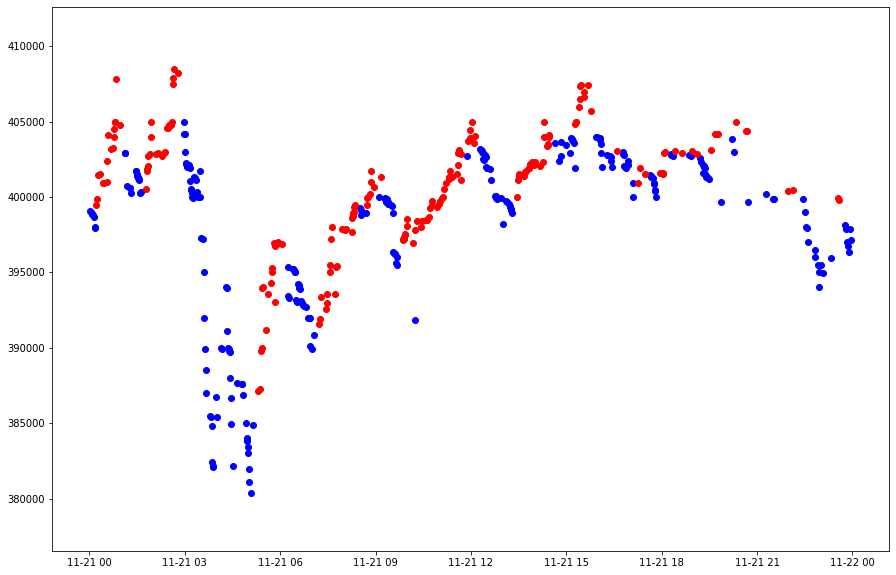

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#ax.plot(sub_data, 'c')
ax.scatter(mins.min_time, mins.local_min, c='blue')
ax.scatter(maxes.max_time, maxes.local_max, c='red')
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

In [41]:
mins

,min_time,local_min
0,2017-11-21 00:01:00,399050
1,2017-11-21 00:03:00,399000
2,2017-11-21 00:04:00,398900
3,2017-11-21 00:05:00,398850
4,2017-11-21 00:06:00,398800
...,...,...
472,2017-11-21 23:48:00,397850
473,2017-11-21 23:50:00,397050
474,2017-11-21 23:52:00,396750
475,2017-11-21 23:53:00,396350


In [175]:
mins.min_time.loc[st_time:ed_time]

Series([], Name: min_time, dtype: datetime64[ns])

In [176]:
mins.set_index('min_time', drop=False).min_time.loc[st_time:ed_time]

min_time
2017-11-21 09:07:00   2017-11-21 09:07:00
2017-11-21 09:17:00   2017-11-21 09:17:00
2017-11-21 09:18:00   2017-11-21 09:18:00
2017-11-21 09:19:00   2017-11-21 09:19:00
2017-11-21 09:21:00   2017-11-21 09:21:00
                              ...        
2017-11-21 15:12:00   2017-11-21 15:12:00
2017-11-21 15:15:00   2017-11-21 15:15:00
2017-11-21 15:16:00   2017-11-21 15:16:00
2017-11-21 15:56:00   2017-11-21 15:56:00
2017-11-21 15:57:00   2017-11-21 15:57:00
Name: min_time, Length: 63, dtype: datetime64[ns]

In [46]:
mins.set_index('min_time').local_min.loc[st_time:ed_time]

min_time
2017-11-21 09:00:00    400500
2017-11-21 09:01:00    400450
2017-11-21 09:02:00    400000
2017-11-21 09:04:00    400200
2017-11-21 09:05:00    400150
                        ...  
2017-11-21 15:47:00    405400
2017-11-21 15:48:00    403300
2017-11-21 15:49:00    403550
2017-11-21 15:51:00    403250
2017-11-21 15:52:00    403150
Name: local_min, Length: 154, dtype: int64

(376546.5, 412585.0)

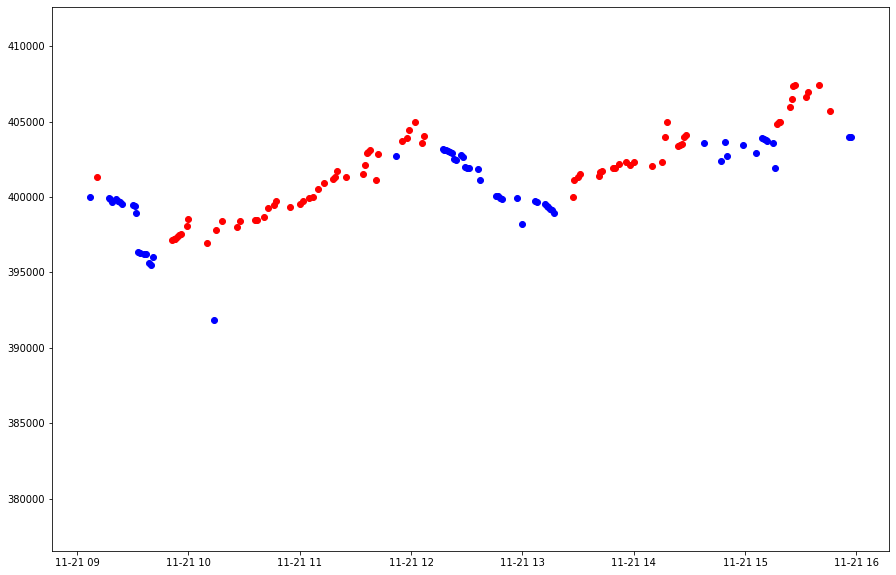

In [174]:
st_time, ed_time = '2017-11-21 09:00:00', '2017-11-21 16:00:00'

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#ax.plot(sub_data.loc[st_time:ed_time], 'c')
ax.scatter(mins.set_index('min_time', drop=False).min_time.loc[st_time:ed_time], mins.set_index('min_time').local_min.loc[st_time:ed_time], c='blue')
ax.scatter(maxes.set_index('max_time', drop=False).max_time.loc[st_time:ed_time], maxes.set_index('max_time').local_max.loc[st_time:ed_time], c='red')
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

In [177]:
mins.shape[0], maxes.shape[0]

(255, 187)

### 전체 데이터로 시각화

(91545.3, 2453290.0)

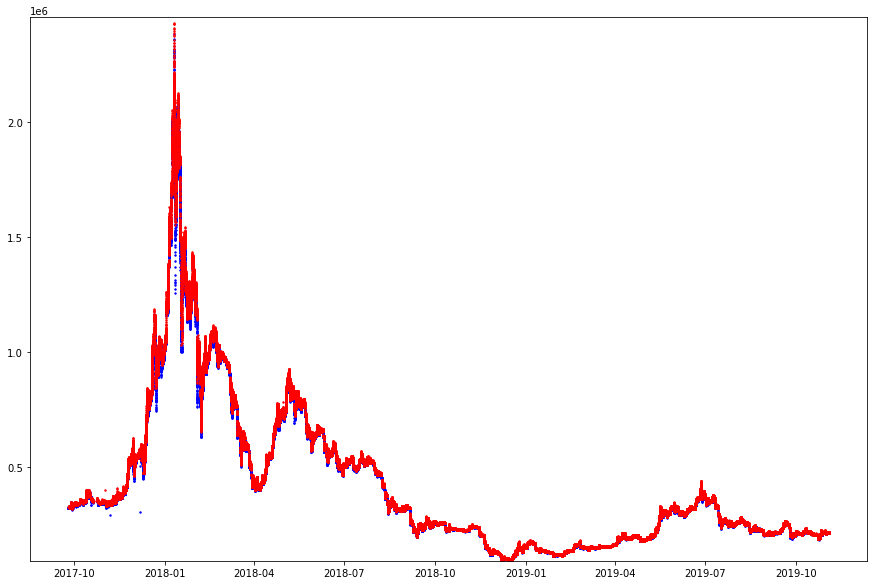

In [179]:
mins_all, maxes_all = get_local_min_max(modify_data['close'], wait=10)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#ax.plot(sub_data, 'c')
ax.scatter(mins_all.min_time, mins_all.local_min, c='blue', s=2)
ax.scatter(maxes_all.max_time, maxes_all.local_max, c='red', s=2)
ax.set_ylim([modify_data['close'].min() * 0.99, modify_data['close'].max() * 1.01])

## 부분 회고
1. 전체 데이터로 시각화 하지 않고, 일부 데이터만 시각화한 이유를 알겠다.
2. 분봉 기준으로 wait 계수를 10 ~ 15 로 했을 때 상승 구간, 하락 구간으로 비교적 잘 레이블링되는 것을 확인했다.

### 2-4. Trend Scanning

In [180]:
def t_val_lin_r(close):
    import statsmodels.api as sml
    
    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit()
    return ols.tvalues[1]

In [181]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

In [182]:
modify_data

,open,high,low,close,volume
time,,,,,
2017-09-25 03:00:00,324500,325500,322000,324000,52.477251
2017-09-25 03:01:00,324000,324000,322500,324000,39.061889
2017-09-25 03:02:00,322500,324500,322500,324500,12.794000
2017-09-25 03:05:00,324000,324000,323000,324000,33.365246
2017-09-25 03:06:00,324000,325000,322500,324000,46.224544
...,...,...,...,...,...
2019-11-03 10:29:00,212650,212800,212600,212800,30.996276
2019-11-03 10:30:00,212800,212800,212600,212600,3.224132
2019-11-03 10:31:00,212600,212600,212400,212400,135.351681


In [53]:
modify_data['2017-11-01':'2017-11-30'].index

DatetimeIndex(['2017-11-01 00:05:00', '2017-11-01 00:12:00',
               '2017-11-01 00:18:00', '2017-11-01 00:24:00',
               '2017-11-01 00:31:00', '2017-11-01 00:37:00',
               '2017-11-01 00:43:00', '2017-11-01 00:50:00',
               '2017-11-01 00:56:00', '2017-11-01 01:02:00',
               ...
               '2017-11-30 23:50:00', '2017-11-30 23:51:00',
               '2017-11-30 23:52:00', '2017-11-30 23:53:00',
               '2017-11-30 23:54:00', '2017-11-30 23:55:00',
               '2017-11-30 23:56:00', '2017-11-30 23:57:00',
               '2017-11-30 23:58:00', '2017-11-30 23:59:00'],
              dtype='datetime64[ns]', name='time', length=33384, freq=None)

In [55]:
tqdm(molecule)

  0%|          | 0/33384 [00:00<?, ?it/s]

In [188]:
modify_data.loc[ind:, 'close'].iloc[:look_forward_window]

time
2017-11-30 23:59:00    519900
2017-12-01 00:00:00    519800
2017-12-01 00:01:00    519000
2017-12-01 00:02:00    516300
2017-12-01 00:03:00    516300
2017-12-01 00:04:00    516100
2017-12-01 00:05:00    518600
2017-12-01 00:06:00    518900
2017-12-01 00:07:00    520000
2017-12-01 00:08:00    522500
2017-12-01 00:09:00    524700
2017-12-01 00:10:00    524400
2017-12-01 00:11:00    524900
2017-12-01 00:12:00    520100
2017-12-01 00:13:00    520000
2017-12-01 00:14:00    520000
2017-12-01 00:15:00    520100
2017-12-01 00:16:00    524300
2017-12-01 00:17:00    524200
2017-12-01 00:18:00    521000
2017-12-01 00:19:00    521500
2017-12-01 00:20:00    520500
2017-12-01 00:21:00    520900
2017-12-01 00:22:00    522200
2017-12-01 00:23:00    524000
2017-12-01 00:24:00    522600
2017-12-01 00:25:00    520500
2017-12-01 00:26:00    519500
2017-12-01 00:27:00    516100
2017-12-01 00:28:00    510000
2017-12-01 00:29:00    511800
2017-12-01 00:30:00    519000
2017-12-01 00:31:00    513000
2017-

In [50]:
# 이 코드 블럭은 실행에 20~30분정도 걸립니다.

molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]  # 전방 탐색을 위한 샘플 추출
    if look_forward_window > subset.shape[0]:
        continue
    
    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # 회귀분석을 통해 t 통계량값을 이용하여 추세 추정
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        tval.append(t_val_lin_r(df.values))
    
    tmp_subset.loc[tmp_subset.index] = np.array(tval)
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]
    tmp_out.append([tmp_subset.index[-1], tmp_t_val, np.sign(tmp_t_val)])

label.loc[molecule] = np.array(tmp_out)  # prevent leakage

label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|██████████| 33384/33384 [15:03<00:00, 36.96it/s]


In [61]:
tmp_subset.shape

(55,)

### 해석
1. 위 Trend scanning 방법은 현재 시점에서 5~60일 앞 시점에 대하여 구한 회귀계수, 즉 두 시점의 기울기 중 절대값이 가장 큰 회귀계수의 부호에 따라 labeling 하는 것으로 이해했다.
2. 이는 곧 5~60일 앞 시점에서 나타나는 가장 두드러진 추세(trend)를 기준으로 하락(0)인지 상승(1)인지 데이터를 분류하는 것이다.

In [71]:
np.array(tmp_out)

array([[Timestamp('2017-11-01 06:10:00'), -6.373986918482869, -1.0],
       [Timestamp('2017-11-01 06:16:00'), -6.273935827662313, -1.0],
       [Timestamp('2017-11-01 06:23:00'), -5.8974743539830605, -1.0],
       ...,
       [Timestamp('2017-12-01 00:56:00'), -7.797664155476283, -1.0],
       [Timestamp('2017-12-01 00:57:00'), -8.272985132119626, -1.0],
       [Timestamp('2017-12-01 00:58:00'), -8.756949102039144, -1.0]],
      dtype=object)

In [72]:
label

,t1,t_val,bin
time,,,
2017-11-01 00:05:00,2017-11-01 06:10:00,-6.373987,-1
2017-11-01 00:12:00,2017-11-01 06:16:00,-6.273936,-1
2017-11-01 00:18:00,2017-11-01 06:23:00,-5.897474,-1
2017-11-01 00:24:00,2017-11-01 06:29:00,-5.425023,-1
2017-11-01 00:31:00,2017-11-01 06:35:00,-5.08177,-1
...,...,...,...
2017-11-30 23:55:00,2017-12-01 00:54:00,-6.890995,-1
2017-11-30 23:56:00,2017-12-01 00:55:00,-7.337545,-1
2017-11-30 23:57:00,2017-12-01 00:56:00,-7.797664,-1


In [76]:
#label.to_csv('label.csv')
pd.read_csv('label.csv', index_col='time')

,t1,t_val,bin
time,,,
2017-11-01 00:05:00,2017-11-01 06:10:00,-6.373987,-1
2017-11-01 00:12:00,2017-11-01 06:16:00,-6.273936,-1
2017-11-01 00:18:00,2017-11-01 06:23:00,-5.897474,-1
2017-11-01 00:24:00,2017-11-01 06:29:00,-5.425023,-1
2017-11-01 00:31:00,2017-11-01 06:35:00,-5.081770,-1
...,...,...,...
2017-11-30 23:55:00,2017-12-01 00:54:00,-6.890995,-1
2017-11-30 23:56:00,2017-12-01 00:55:00,-7.337545,-1
2017-11-30 23:57:00,2017-12-01 00:56:00,-7.797664,-1


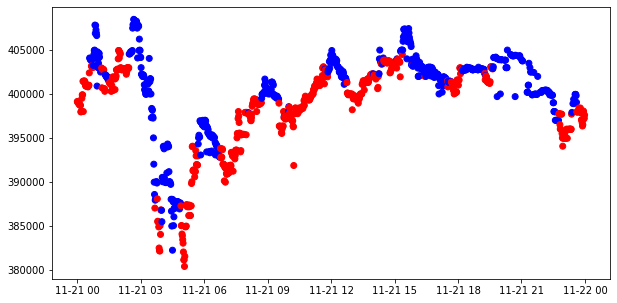

In [51]:
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values,
              c=c_sig['color'])

### 해석
1. 앞선 해석에서 언급한 것과 같이 기울기가 가장 가파른 시점(상승이든 하락이든)을 기준으로 상승과 하락을 비교적 잘 분류한 것으로 보인다.

# 3. Feature Engineering

In [77]:
#!pip install ta==0.9.0
#!pip install shap

  Using cached ta-0.9.0-py3-none-any.whl
     |████████████████████████████████| 535 kB 7.0 MB/s            


In [78]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

import sys
sys.path.append('/aiffel/aiffel/fnguide/data/')
from libs.feature_importance import importance as imp
from sklearn.feature_selection import SequentialFeatureSelector, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

In [79]:
DATA_PATH = '/aiffel/aiffel/fnguide/data/'
anno_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick_label.pkl')
target_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv')

In [84]:
df_modify_data = pd.read_csv(target_file_name, index_col=0, parse_dates=True)
df_label_data = pd.read_pickle(anno_file_name)
df_sub_modify_data = df_modify_data.loc[df_label_data.index]

In [85]:
df_modify_data

,open,high,low,close,volume
time,,,,,
2017-09-25 03:00:00,324500,325500,322000,324000,52.477251
2017-09-25 03:01:00,324000,324000,322500,324000,39.061889
2017-09-25 03:02:00,322500,324500,322500,324500,12.794000
2017-09-25 03:05:00,324000,324000,323000,324000,33.365246
2017-09-25 03:06:00,324000,325000,322500,324000,46.224544
...,...,...,...,...,...
2019-11-03 10:29:00,212650,212800,212600,212800,30.996276
2019-11-03 10:30:00,212800,212800,212600,212600,3.224132
2019-11-03 10:31:00,212600,212600,212400,212400,135.351681


In [86]:
df_label_data

time
2018-01-01 00:00:00   -0.0
2018-01-01 00:01:00   -0.0
2018-01-01 00:02:00   -0.0
2018-01-01 00:03:00   -1.0
2018-01-01 00:04:00   -1.0
                      ... 
2019-11-03 10:29:00    NaN
2019-11-03 10:30:00    NaN
2019-11-03 10:31:00    NaN
2019-11-03 10:32:00    NaN
2019-11-03 10:33:00    NaN
Name: t_value, Length: 908917, dtype: float64

In [89]:
df_label_data.value_counts()

-1.0    306636
-0.0    302963
 1.0    299289
Name: t_value, dtype: int64

In [87]:
df_sub_modify_data

,open,high,low,close,volume
time,,,,,
2018-01-01 00:00:00,1028000,1028000,1026500,1028000,41.835689
2018-01-01 00:01:00,1028000,1029000,1026000,1028500,22.307810
2018-01-01 00:02:00,1028000,1029000,1028000,1028000,59.276102
2018-01-01 00:03:00,1028000,1028000,1014000,1014000,114.203740
2018-01-01 00:04:00,1020000,1027000,1014500,1025000,62.695404
...,...,...,...,...,...
2019-11-03 10:29:00,212650,212800,212600,212800,30.996276
2019-11-03 10:30:00,212800,212800,212600,212600,3.224132
2019-11-03 10:31:00,212600,212600,212400,212400,135.351681


In [88]:
# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
df_sub_modify_data = df_sub_modify_data.iloc[:1000]

## Technical Index
1. https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html
2. https://libraries.io/pypi/ta

기술적 지표란?

시장의 주가 또는 거래량 데이터를 기반으로 주가의 향방을 예측하기 위해 고안된 지표입니다.



- 추세 지표

MACD, Moving Average Convergence/Divergence : 단기 이평선과 장기 이평선의 차이로 주가의 수렴 / 확산 정도를 나타내는 지표, 'signal', 'average', 'diverence'로 구성됨.

ADX, Average Directional Movement : 금일의 주가 움직임의 범위가 전일의 범위를 어느 방향으로 벗어났는지를 관찰, 추세의 강도를 추적하는 지표

TRIX, Triple Exponential : n-영업일 지수가중평균을 3번 연달아 실시한 후, 그 값의 기울기를 나타낸 지표

DPO, detrended price oscillator : 가장 최신의 가격 흐름에 반응하지 않도록 변위된 이동평균을 사용하여, 장기추세를 제거하기 위한 지표. 중기 과매수 / 과매도 정도를 표시

AROON, AROON : 추세의 강도와 변화를 식별하기 위한 지표, 고가사이의 시간차와 저가사이의 시간차를 측정



- 변동성 지표

ATR, Average True Range : 시장의 변동성을 측정하기 위한 지표, (고가 - 저가), (고가 - 전일종가)의 절대값, (저가 - 전일종가)의 절대값 중 큰값을 취하여, 이동평균

UI, Ulcer Index : 가격 하락의 유지기간, 깊이를 통해 가격의 하락 위험을 측정하는 지표



- 거래량 지표

CMF, Chaikin Money Flow : 산출방식이 MACD와 유사, 두 accumulation/distribution line의 EMA값의 차이를 통해 돈의 유입/유출을 파악하려는 지표

MFI, Money Flow Index : 가격의 흐름과 거래량의 조합으로 모멘텀의 방향성을 나타내는 지표

FI, Force Index : 가격과 거래량을 사용하여 가격의 움직임을 좌우하는 힘의 강도를 측정하는 지표

SMA EM, Ease of Movement : 가격의 상승/하락을 판단하기 위한 지표. 가격의 변동성과 거래량을 통해 가격 흐름의 용이성을 측정

VPT, Volume Price Trend : 가격의 변화 강도와 그 방향을 나타내는 지표. 수요 / 공급의 균형을 측정



- 모멘텀 지표

RSI, Relative Strength Index : 가격 흐름의 상대강도를 측정하는 지표. 일정기간 내의 평균 수익과 손실의 강도를 비교함.

WR, Williams %R : 과매도 / 과매수를 측정하는 지표(-100 ~ 0). 진입 / 청산 시점을 포착하는데 사용됨.

In [90]:
mt = 1
fillna = False
df_ = df_sub_modify_data.copy()
open, high, low, close, volume = 'open', 'high', 'low', 'close', 'volume'
cols = [open, high, low, close, volume]

## Volume Index
# Chaikin Money Flow
df_["volume_cmf"] = ta.volume.ChaikinMoneyFlowIndicator(
                        high=df_[high], low=df_[low], close=df_[close], volume=df_[volume], window=20*mt, fillna=fillna
                    ).chaikin_money_flow()
# Force Index
df_["volume_fi"] = ta.volume.ForceIndexIndicator(
                        close=df_[close], volume=df_[volume], window=15*mt, fillna=fillna
                    ).force_index()
# Money Flow Indicator
df_["volume_mfi"] = ta.volume.MFIIndicator(
                        high=df_[high],
                        low=df_[low],
                        close=df_[close],
                        volume=df_[volume],
                        window=15*mt,
                        fillna=fillna,
                    ).money_flow_index()
# Ease of Movement
df_["volume_sma_em"] = ta.volume.EaseOfMovementIndicator(
                            high=df_[high], low=df_[low], volume=df_[volume], window=15*mt, fillna=fillna
                        ).sma_ease_of_movement()

# Volume Price Trend
df_["volume_vpt"] = ta.volume.VolumePriceTrendIndicator(
                        close=df_[close], volume=df_[volume], fillna=fillna
                    ).volume_price_trend()

## volatility index
# Average True Range
df_["volatility_atr"] = ta.volatility.AverageTrueRange(
                            close=df_[close], high=df_[high], low=df_[low], window=10*mt, fillna=fillna
                        ).average_true_range()

# Ulcer Index
df_["volatility_ui"] = ta.volatility.UlcerIndex(
                            close=df_[close], window=15*mt, fillna=fillna
                        ).ulcer_index()

## trend index
# MACD
df_["trend_macd_diff"] = ta.trend.MACD(
                            close=df_[close], window_slow=25*mt, window_fast=10*mt, window_sign=9, fillna=fillna
                        ).macd_diff()

# Average Directional Movement Index (ADX)
df_["trend_adx"] = ta.trend.ADXIndicator(
                        high=df_[high], low=df_[low], close=df_[close], window=15*mt, fillna=fillna
                    ).adx()

# TRIX Indicator
df_["trend_trix"] = ta.trend.TRIXIndicator(
                        close=df_[close], window=15*mt, fillna=fillna
                    ).trix()

# Mass Index
df_["trend_mass_index"] = ta.trend.MassIndex(
                            high=df_[high], low=df_[low], window_fast=10*mt, window_slow=25*mt, fillna=fillna
                        ).mass_index()

# DPO Indicator
df_["trend_dpo"] = ta.trend.DPOIndicator(
                        close=df_[close], window=20*mt, fillna=fillna
                    ).dpo()

# Aroon Indicator
df_["trend_aroon_ind"] = ta.trend.AroonIndicator(close=df_[close], window=20, fillna=fillna).aroon_indicator()

## momentum index
# Relative Strength Index (RSI)
df_["momentum_rsi"] = ta.momentum.RSIIndicator(close=df_[close], window=15*mt, fillna=fillna).rsi()

# Williams R Indicator
df_["momentum_wr"] = ta.momentum.WilliamsRIndicator(
                        high=df_[high], low=df_[low], close=df_[close], lbp=15*mt, fillna=fillna
                    ).williams_r()

In [91]:
# 결과 확인
df_

,open,high,low,close,volume,volume_cmf,volume_fi,volume_mfi,volume_sma_em,volume_vpt,volatility_atr,volatility_ui,trend_macd_diff,trend_adx,trend_trix,trend_mass_index,trend_dpo,trend_aroon_ind,momentum_rsi,momentum_wr
time,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1028000,1028000,1026500,1028000,41.835689,NaN,NaN,NaN,NaN,-0.796083,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:01:00,1028000,1029000,1026000,1028500,22.307810,NaN,NaN,NaN,NaN,-0.788285,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:02:00,1028000,1029000,1028000,1028000,59.276102,NaN,NaN,NaN,NaN,-0.017967,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:03:00,1028000,1028000,1014000,1014000,114.203740,NaN,NaN,NaN,NaN,-1.584121,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:04:00,1020000,1027000,1014500,1025000,62.695404,NaN,NaN,NaN,NaN,-0.875176,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 16:35:00,1052500,1052500,1052500,1052500,6.084122,-0.232633,-2275.848327,71.279251,-3.186964e+12,0.007381,1416.425464,0.361107,652.357742,20.661135,-0.018034,23.066052,-225.0,-35.0,52.934202,-0.0
2018-01-01 16:36:00,1052500,1052500,1049500,1050000,9.205537,-0.165805,-4868.097577,67.762226,-3.097651e+12,-0.021866,1574.782918,0.349329,482.768654,21.007559,-0.016660,23.029259,-2100.0,-35.0,44.041843,-62.5
2018-01-01 16:37:00,1050000,1050000,1049000,1049000,3.472849,-0.161093,-4693.691500,74.267351,-5.977131e+12,-0.025173,1517.304626,0.342452,280.010175,21.537826,-0.015683,22.971985,-1925.0,-35.0,41.083991,-87.5


### 수익률 / 변동성 지표

In [92]:
windows_mom = [5, 10, 20]
windows_std = [30]

for i in windows_mom:
    df_[f'vol_change_{i}'] = df_.volume.pct_change(i).round(6)
    df_[f'ret_{i}'] = df_.close.pct_change(i).round(6)

for i in windows_std:
    df_[f'std_{i}'] = df_.close.rolling(i).std()
    df_[f'vol_std_{i}'] = df_.volume.rolling(i).std()

In [94]:
df_.volume.pct_change(3)

time
2018-01-01 00:00:00         NaN
2018-01-01 00:01:00         NaN
2018-01-01 00:02:00         NaN
2018-01-01 00:03:00    1.729816
2018-01-01 00:04:00    1.810469
                         ...   
2018-01-01 16:35:00    0.263095
2018-01-01 16:36:00   -0.700044
2018-01-01 16:37:00    0.120274
2018-01-01 16:38:00   -0.611395
2018-01-01 16:39:00    0.971591
Name: volume, Length: 1000, dtype: float64

In [95]:
# 결과 확인
df_

,open,high,low,close,volume,volume_cmf,volume_fi,volume_mfi,volume_sma_em,volume_vpt,...,momentum_rsi,momentum_wr,vol_change_5,ret_5,vol_change_10,ret_10,vol_change_20,ret_20,std_30,vol_std_30
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1028000,1028000,1026500,1028000,41.835689,NaN,NaN,NaN,NaN,-0.796083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:01:00,1028000,1029000,1026000,1028500,22.307810,NaN,NaN,NaN,NaN,-0.788285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:02:00,1028000,1029000,1028000,1028000,59.276102,NaN,NaN,NaN,NaN,-0.017967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:03:00,1028000,1028000,1014000,1014000,114.203740,NaN,NaN,NaN,NaN,-1.584121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:04:00,1020000,1027000,1014500,1025000,62.695404,NaN,NaN,NaN,NaN,-0.875176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 16:35:00,1052500,1052500,1052500,1052500,6.084122,-0.232633,-2275.848327,71.279251,-3.186964e+12,0.007381,...,52.934202,-0.0,-0.817192,0.002381,-0.265538,0.003815,0.703781,0.000000,1811.600550,15.025354
2018-01-01 16:36:00,1052500,1052500,1049500,1050000,9.205537,-0.165805,-4868.097577,67.762226,-3.097651e+12,-0.021866,...,44.041843,-62.5,0.394890,0.000000,0.274989,0.001431,-0.625893,-0.002375,1787.568824,9.944774
2018-01-01 16:37:00,1050000,1050000,1049000,1049000,3.472849,-0.161093,-4693.691500,74.267351,-5.977131e+12,-0.025173,...,41.083991,-87.5,-0.279019,-0.001903,-0.609186,0.000477,-0.849066,-0.003325,1763.291071,9.932495


In [97]:
df_label_data

time
2018-01-01 00:00:00   -0.0
2018-01-01 00:01:00   -0.0
2018-01-01 00:02:00   -0.0
2018-01-01 00:03:00   -1.0
2018-01-01 00:04:00   -1.0
                      ... 
2019-11-03 10:29:00    NaN
2019-11-03 10:30:00    NaN
2019-11-03 10:31:00    NaN
2019-11-03 10:32:00    NaN
2019-11-03 10:33:00    NaN
Name: t_value, Length: 908917, dtype: float64

In [96]:
df_tmp_data = df_.join(df_label_data).dropna()
X, y = df_tmp_data.iloc[:, 5:-1], df_tmp_data.iloc[:, -1]

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [99]:
X_sc

,volume_cmf,volume_fi,volume_mfi,volume_sma_em,volume_vpt,volatility_atr,volatility_ui,trend_macd_diff,trend_adx,trend_trix,...,momentum_rsi,momentum_wr,vol_change_5,ret_5,vol_change_10,ret_10,vol_change_20,ret_20,std_30,vol_std_30
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:43:00,1.035464,-0.186753,0.065427,0.391695,0.143181,1.474065,0.054076,0.103695,0.930692,-0.078062,...,-0.141586,0.073599,-0.268825,-0.053926,-0.273922,-0.077989,-0.359687,0.617241,-0.335632,0.273404
2018-01-01 00:44:00,1.054026,0.125880,-0.011156,0.814123,0.544363,1.478520,0.017250,0.639945,0.771813,-0.051294,...,0.344922,1.111779,-0.209690,2.237163,-0.263511,0.036043,-0.266915,0.940844,-0.262646,0.291664
2018-01-01 00:45:00,1.042978,-0.023653,0.063195,1.052689,0.218332,1.290057,-0.020738,0.714133,0.598850,-0.015958,...,0.067032,0.544625,-0.124252,0.554780,-0.278339,0.150308,-0.252720,0.942325,-0.237456,0.301886
2018-01-01 00:46:00,1.016133,0.880060,-0.281931,0.928143,1.068429,1.633699,-0.020738,1.434675,0.454452,0.071047,...,0.783648,1.457839,0.168697,2.536405,-0.228841,0.833801,-0.227291,1.672326,-0.022928,0.256716
2018-01-01 00:47:00,0.893440,0.486864,-0.562722,-0.026395,0.862103,1.942977,0.088583,0.921217,0.319680,0.131133,...,-0.191611,-0.257415,-0.080204,0.402681,-0.380178,0.036276,-0.340320,0.454122,-0.018291,0.317671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 16:35:00,-1.315704,-0.287078,0.964449,-0.694987,-0.028358,-1.154914,0.009347,1.119360,-0.213129,-1.070983,...,0.091216,1.457839,-0.290098,0.683646,-0.263339,0.809831,-0.049429,-0.113254,-0.671848,-1.323649
2018-01-01 16:36:00,-1.052102,-0.373901,0.756529,-0.671205,-0.202126,-0.951719,-0.032148,0.829596,-0.171873,-1.002590,...,-0.789172,-0.596892,-0.103629,-0.053926,-0.156305,0.255031,-0.320415,-0.504179,-0.686893,-1.747571
2018-01-01 16:37:00,-1.033515,-0.368059,1.141100,-1.437940,-0.221777,-1.025471,-0.056373,0.483158,-0.108723,-0.953990,...,-1.082014,-1.418785,-0.207305,-0.643426,-0.331387,0.033018,-0.365897,-0.660549,-0.702092,-1.748596


In [100]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_sc, y)

RandomForestClassifier(class_weight='balanced')

# 4. Feature Selection Methods

특성선택(Feature Selection)을 위한 기법으로 다음과 같은 방법이 있습니다.

① Feature Selection
- MDI
- MDA

② Sequential Feature Selection
- RFE CV
- SFS

③ Shapley Additive explanations
- SHAP

## 4-1. Feature Selection

### MDI, Mean Decrease Impurity

In [101]:
feat_imp = imp.mean_decrease_impurity(rfc, X.columns)

In [102]:
feat_imp

,mean,std
volume_cmf,0.047999,0.002228
volume_fi,0.042834,0.002378
volume_mfi,0.041143,0.002468
volume_sma_em,0.035446,0.001871
volume_vpt,0.025109,0.001473
volatility_atr,0.080423,0.003349
volatility_ui,0.047880,0.002161
trend_macd_diff,0.071790,0.004133
trend_adx,0.053664,0.002434
trend_trix,0.069861,0.003266


### MDA, Mean Decrease Accuracy

In [103]:
svc_rbf = SVC(kernel='rbf', probability=True)
cv = KFold(n_splits=5)
feat_imp_mda = imp.mean_decrease_accuracy(svc_rbf, X_sc, y, cv_gen=cv)

In [104]:
def plot_feature_importance(importance_df, save_fig=False, output_path=None):
    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    if save_fig:
        plt.savefig(output_path)
    else:
        plt.show()

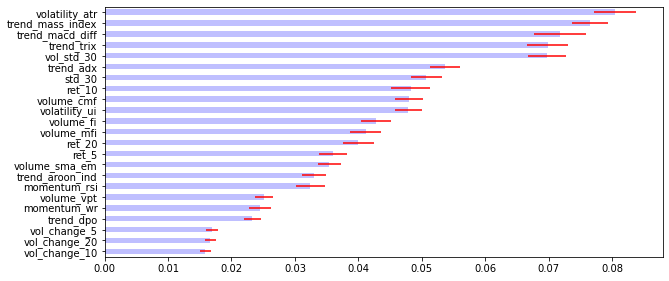

In [105]:
plot_feature_importance(feat_imp)

ㄴ MDI, Mean Decrease Impurity의 결과를 시각화 - 표본 내 평가 기준으로 변수의 상대적 중요성을 확인하였다.

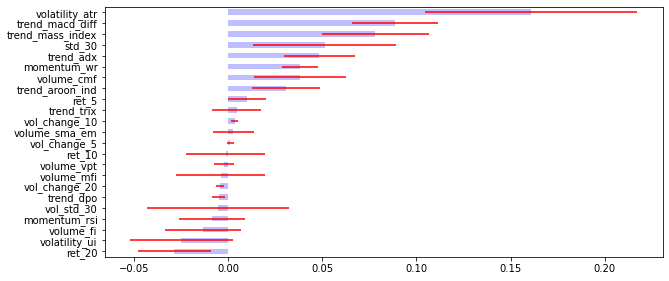

In [106]:
plot_feature_importance(feat_imp_mda)

ㄴ MDA, Mean Decrease Accuracy 결과를 시각화 - 표본 밖 평가 지표를 기준(k-fold cross validation)으로 변수의 상대적 중요성을 확인한다.

## 4-2. Sequential Feature Selection

### RFE CV, Recursive Feature Elimination

In [107]:
svc_rbf = SVC(kernel='linear', probability=True)
rfe_cv = RFECV(svc_rbf, cv=cv)
rfe_fitted = rfe_cv.fit(X_sc, y)

### SFS, Sequential Feature Selection

In [108]:
sfs_forward = SequentialFeatureSelector(svc_rbf, n_features_to_select=2, direction='forward')
sfs_fitted = sfs_forward.fit(X_sc, y)

## 4-3. SHAP, Shapley Additive explanations

In [109]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_value = explainer.shap_values(X_sc)

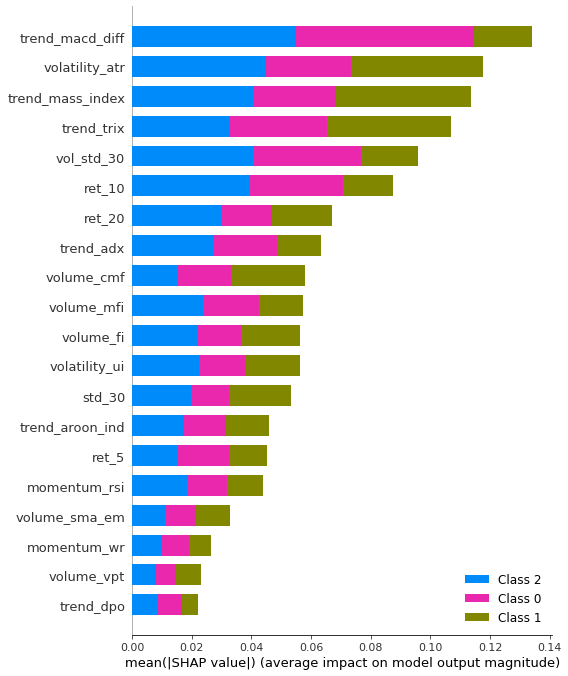

In [110]:
shap.summary_plot(shap_value, X_sc)

In [111]:
output_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')
df_tmp_data.to_pickle(output_file_name)

In [112]:
df_tmp_data

,open,high,low,close,volume,volume_cmf,volume_fi,volume_mfi,volume_sma_em,volume_vpt,...,momentum_wr,vol_change_5,ret_5,vol_change_10,ret_10,vol_change_20,ret_20,std_30,vol_std_30,t_value
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:43:00,1017500,1019000,1017500,1018500,30.272135,0.363435,719.550725,56.072055,8.940793e+11,0.036253,...,-42.105263,-0.678913,0.000000,-0.318982,0.000000,-0.818597,0.004438,2348.636190,34.165561,1.0
2018-01-01 00:44:00,1018500,1021500,1018000,1021500,25.131162,0.368141,10053.792799,54.776628,2.480511e+12,0.103776,...,-10.526316,-0.294524,0.007396,-0.266406,0.000490,-0.363379,0.006404,2465.217810,34.384398,1.0
2018-01-01 00:45:00,1021500,1022000,1020000,1020000,17.108609,0.365340,5589.204549,56.034287,3.376449e+12,0.048901,...,-27.777778,0.260837,0.001965,-0.341287,0.000981,-0.293731,0.006413,2505.453821,34.506907,1.0
2018-01-01 00:46:00,1020000,1025000,1019000,1025000,44.289130,0.358534,32571.260299,50.196394,2.908715e+12,0.191981,...,-0.000000,2.165060,0.008362,-0.091323,0.003918,-0.168955,0.010848,2848.118960,33.965563,1.0
2018-01-01 00:47:00,1020000,1020000,1019000,1019000,10.224255,0.327429,20831.661354,45.446741,-6.760619e+11,0.157254,...,-52.173913,0.547160,0.001474,-0.855580,0.000491,-0.723566,0.003447,2855.524994,34.696090,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 16:35:00,1052500,1052500,1052500,1052500,6.084122,-0.232633,-2275.848327,71.279251,-3.186964e+12,0.007381,...,-0.000000,-0.817192,0.002381,-0.265538,0.003815,0.703781,0.000000,1811.600550,15.025354,0.0
2018-01-01 16:36:00,1052500,1052500,1049500,1050000,9.205537,-0.165805,-4868.097577,67.762226,-3.097651e+12,-0.021866,...,-62.500000,0.394890,0.000000,0.274989,0.001431,-0.625893,-0.002375,1787.568824,9.944774,0.0
2018-01-01 16:37:00,1050000,1050000,1049000,1049000,3.472849,-0.161093,-4693.691500,74.267351,-5.977131e+12,-0.025173,...,-87.500000,-0.279019,-0.001903,-0.609186,0.000477,-0.849066,-0.003325,1763.291071,9.932495,0.0


# 5. Model Training

In [113]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

sys.path.append('/aiffel/aiffel/fnguide/data/')
from libs.mlutil.pkfold import PKFold

In [114]:
DATA_PATH = '/aiffel/aiffel/fnguide/data/'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')

In [115]:
df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)

In [116]:
df_data['t_value'].value_counts()

1.0    481
0.0    476
Name: t_value, dtype: int64

### ㄴ t_value
1. Trend scanning 방법을 기준으로 시계열 데이터의 labeling을 결정하였다.
2. 앞서 Trend scanning 플롯에서 확인한 것과 같이 가격 데이터의 상승 추세와 하락 추세를 비교적 잘 포착하였다.

In [117]:
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

In [118]:
X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [119]:
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
train_x = train_x[:1000]
train_y = train_y[:1000]

### Purged K-fold for Cross-Validation


In [120]:
n_cv = 4
t1 = pd.Series(train_y.index.values, index=train_y.index)
# purged K-Fold
cv = PKFold(n_cv, t1, 0)

### Find the best param for bagging(RandomForest) with grid-search

1. https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
2. https://angeloyeo.github.io/2020/08/05/ROC.html

In [121]:
# 20분 소요
bc_params = {'n_estimators': [5, 10, 20],
             'max_features': [0.5, 0.7],
             'base_estimator__max_depth': [3,5,10,20],
             'base_estimator__max_features': [None, 'auto'],
             'base_estimator__min_samples_leaf': [3, 5, 10],
             'bootstrap_features': [False, True]
            }
             
rfc = RandomForestClassifier(class_weight='balanced')
bag_rfc = BaggingClassifier(rfc)
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1)
gs_rfc.fit(train_x, train_y)
gs_rfc_best = gs_rfc.best_estimator_

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


In [122]:
gs_rfc_best.fit(train_x, train_y)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                        max_depth=10,
                                                        max_features=None,
                                                        min_samples_leaf=10),
                  max_features=0.7)

In [123]:
## Best Hyperparameters
'''
BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                        max_depth=10,
                                                        max_features=None,
                                                        min_samples_leaf=10),
                                                        max_features=0.7)
'''

"\nBaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',\n                                                        max_depth=10,\n                                                        max_features=None,\n                                                        min_samples_leaf=10),\n                  max_features=0.7)\n"

In [124]:
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

In [189]:
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

================= confusion matrix ====================
[[80 56]
 [14 41]]
정확도:0.6335078534031413, 정밀도:0.422680412371134, 재현율:0.7454545454545455


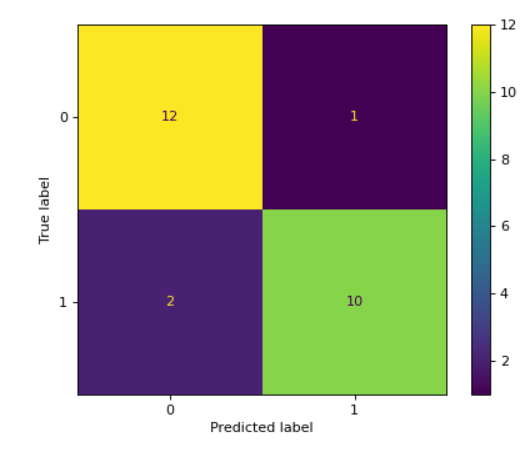

### ㄴ 해석 및 인사이트
1. 리스크를 무릎쓰고 적극적인 투자를 선호한다면 재현율이 높은 위 모델을 선택할 수 있다. 재현율(민감도)는 거짓음성을 최소화하는 지표로, 코인의 가격이 상승하는 것을 잘 맞춘 것이 약 75%가 된다. 따라서 high rist, high return을 선호한다면 재현율을 기준으로 위 모델을 활용할 수 있다.


2. 반면에 가격이 상승할 것이라고 예측한 것 중 적중한 비율인 정밀도는 약 42%로 상대적으로 낮은 결과를 확인할 수 있다. 따라서 모델의 정밀도는 리스크를 최소화하는 성향을 가진 투자자라면(투기자ㅋ) 해당 모델을 활용하는 것을 지양해야 하는 지표가 된다.


3. 한편 전체적인 정확도는 63%로 나온다. 

auc:0.6668449197860963


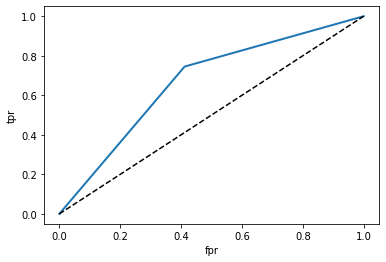

In [126]:
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

# 6. 다른 모델로 예측 해보기

#### a. Purged K-fold for Cross-Validation 수정

In [193]:
n_cv_modified = 5
t1_modified = pd.Series(train_y.index.values, index=train_y.index)
# purged K-Fold
cv_modified = PKFold(n_cv_modified, t1_modified, 0)

#### b. 모델 변경 - XGRegressor를 활용한 그리드서치

In [194]:
from xgboost import XGBRegressor

In [195]:
bc_params = {'learning_rate':[0.07, 0.05], 
             'max_depth':[1, 3, 5, 7, 9], 
             'n_estimators':[5, 10, 20, 30, 40, 50],
             'subsample':[0.9, 0.8, 0.7, 0.6, 0.5]
             }

xgb = XGBRegressor()
gs_xgb = GridSearchCV(xgb, bc_params, cv=cv_modified, n_jobs=-1, verbose=4)
gs_xgb.fit(train_x, train_y)
gs_xgb_best = gs_xgb.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


[CV 1/5] END learning_rate=0.07, max_depth=1, n_estimators=5, subsample=0.9;, score=0.042 total time=   0.4s
[CV 4/5] END learning_rate=0.07, max_depth=1, n_estimators=5, subsample=0.9;, score=-0.183 total time=   1.1s
[CV 5/5] END learning_rate=0.07, max_depth=1, n_estimators=5, subsample=0.9;, score=0.113 total time=   1.4s
[CV 3/5] END learning_rate=0.07, max_depth=1, n_estimators=5, subsample=0.8;, score=0.011 total time=   1.1s
[CV 1/5] END learning_rate=0.07, max_depth=1, n_estimators=5, subsample=0.7;, score=0.038 total time=   1.1s
[CV 4/5] END learning_rate=0.07, max_depth=1, n_estimators=5, subsample=0.7;, score=-0.191 total time=   1.2s
[CV 2/5] END learning_rate=0.07, max_depth=1, n_estimators=5, subsample=0.6;, score=-8.231 total time=   1.1s
[CV 5/5] END learning_rate=0.07, max_depth=1, n_estimators=5, subsample=0.6;, score=0.104 total time=   0.9s
[CV 3/5] END learning_rate=0.07, max_depth=1, n_estimators=5, subsample=0.5;, score=0.015 total time=   0.3s
[CV 4/5] END lea

In [198]:
print('최적 하이퍼파라미터:', gs_xgb.best_params_)

# 최적 하이퍼파라미터: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 5, 'subsample': 0.9}

최적 하이퍼파라미터: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 5, 'subsample': 0.9}
[CV 4/5] END learning_rate=0.05, max_depth=9, n_estimators=40, subsample=0.9;, score=-0.004 total time=  51.2s
[CV 4/5] END learning_rate=0.05, max_depth=9, n_estimators=40, subsample=0.8;, score=-0.019 total time=  28.5s
[CV 2/5] END learning_rate=0.05, max_depth=9, n_estimators=40, subsample=0.7;, score=-13.595 total time=  51.7s
[CV 5/5] END learning_rate=0.05, max_depth=9, n_estimators=40, subsample=0.7;, score=0.193 total time=  16.5s
[CV 2/5] END learning_rate=0.05, max_depth=9, n_estimators=40, subsample=0.6;, score=-14.003 total time=   9.6s
[CV 3/5] END learning_rate=0.05, max_depth=9, n_estimators=40, subsample=0.6;, score=-0.088 total time=  49.7s
[CV 1/5] END learning_rate=0.05, max_depth=9, n_estimators=40, subsample=0.5;, score=0.006 total time=   8.0s
[CV 2/5] END learning_rate=0.05, max_depth=9, n_estimators=40, subsample=0.5;, score=-12.410 total time=  54.3s
[CV 5/5] END learning_

#### c. best hyperparameters 모델 피팅

In [200]:
gs_xgb_best.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [202]:
pred_y_xgb = gs_xgb_best.predict(test_x)
#prob_y_xgb = gs_xgb_best.predict_proba(test_x)

In [206]:
# 확률 값을 0.5를 기준으로 1, 0으로 변환
pred_y_xgb = (pred_y_xgb > 0.5).astype(int)

#### d. 결과 해석

In [207]:
confusion_xgb = confusion_matrix(test_y, pred_y_xgb)
accuracy_xgb  = accuracy_score(test_y, pred_y_xgb)
precision_xgb = precision_score(test_y, pred_y_xgb)
recall_xgb    = recall_score(test_y, pred_y_xgb)

print('================= confusion matrix ====================')
print(confusion_xgb)
print('=======================================================')
print(f'정확도:{accuracy_xgb}, 정밀도:{precision_xgb}, 재현율:{recall_xgb}')

================= confusion matrix ====================
[[82 54]
 [18 37]]
정확도:0.6230366492146597, 정밀도:0.4065934065934066, 재현율:0.6727272727272727


auc:0.6378342245989306


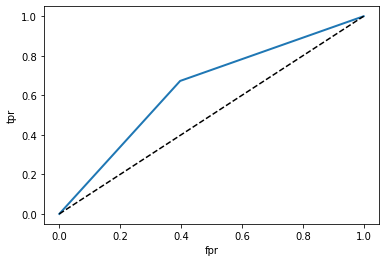

In [208]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(test_y, pred_y_xgb)
auc_xgb = roc_auc_score(test_y, pred_y_xgb)
plt.plot(fpr_xgb, tpr_xgb, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc_xgb}')

### 결과
1. 정확도:0.62, 정밀도:0.41, 재현율:0.67, auc:0.64
2. Xgb 예측기의 성능은 랜덤포레스트 분류기에 미치지 못하였다.

#### XGBClassifier를 통한 분류

In [209]:
from xgboost import XGBClassifier

In [210]:
%%time

bc_params = {'learning_rate':[0.05], 
             'max_depth':[1, 3, 5, 7], 
             'n_estimators':[5, 10, 20, 30],
             'subsample':[0.9, 0.8, 0.7, 0.6, 0.5],
             'eval_metric':['logloss']}

xgb_c = XGBClassifier()
gs_xgb_c = GridSearchCV(xgb_c, bc_params, cv=cv_modified, n_jobs=-1, verbose=4)
gs_xgb_c.fit(train_x, train_y)
gs_xgb_c_best = gs_xgb_c.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be r

[CV 2/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.9;, score=0.590 total time=   0.1s
[CV 4/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.9;, score=0.537 total time=   0.3s
[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.8;, score=0.634 total time=   0.6s
[CV 2/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.8;, score=0.590 total time=   0.6s
[CV 5/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.8;, score=0.709 total time=   0.4s
[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.7;, score=0.560 total time=   0.2s
[CV 2/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.7;, score=0.590 total time=   0.4s
[CV 5/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsamp

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[CV 3/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.9;, score=0.515 total time=   1.1s
[CV 3/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.8;, score=0.537 total time=   1.3s
[CV 3/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.7;, score=0.567 total time=   1.2s
[CV 3/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.6;, score=0.582 total time=   1.3s
[CV 2/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.5;, score=0.590 total time=   1.2s
[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=10, subsample=0.9;, score=0.634 total time=   2.5s
[CV 5/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=10, subsample=0.9;, score=0.746 total time=   2.3s
[CV 4/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=10, subs

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.9;, score=0.634 total time=   0.8s
[CV 5/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.9;, score=0.769 total time=   1.1s
[CV 4/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.8;, score=0.537 total time=   1.2s
[CV 4/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.7;, score=0.537 total time=   1.3s
[CV 4/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.6;, score=0.537 total time=   1.2s
[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=5, subsample=0.5;, score=0.657 total time=   1.3s
[CV 2/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=10, subsample=0.9;, score=0.590 total time=   2.3s
[CV 4/5] END eval_metric=logloss, learning_rate=0.05, max_depth=1, n_estimators=10, subsa

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=30, subsample=0.5;, score=0.687 total time=   3.1s
[CV 3/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=30, subsample=0.5;, score=0.537 total time=   7.9s
[CV 5/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=30, subsample=0.5;, score=0.769 total time=   7.3s
[CV 5/5] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=5, subsample=0.9;, score=0.709 total time=   0.5s
[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=5, subsample=0.8;, score=0.701 total time=   0.7s
[CV 2/5] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=5, subsample=0.8;, score=0.410 total time=   0.8s
[CV 3/5] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=5, subsample=0.8;, score=0.440 total time=   0.3s
[CV 4/5] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=5, subs

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[CV 5/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=10, subsample=0.6;, score=0.769 total time=   0.8s
[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=10, subsample=0.5;, score=0.642 total time=   1.3s
[CV 5/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=10, subsample=0.5;, score=0.828 total time=   1.0s
[CV 3/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=20, subsample=0.9;, score=0.522 total time=   2.3s
[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=20, subsample=0.8;, score=0.664 total time=   3.9s
[CV 5/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=20, subsample=0.8;, score=0.724 total time=   1.7s
[CV 2/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=20, subsample=0.7;, score=0.440 total time=   4.7s
[CV 2/5] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=20,

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

CPU times: user 1.53 s, sys: 171 ms, total: 1.7 s
Wall time: 14min 32s


In [213]:
print('최적 하이퍼파라미터:', gs_xgb_c.best_params_)

# 최적 하이퍼파라미터: {'eval_metric': 'logloss', 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 5, 'subsample': 0.9}

최적 하이퍼파라미터: {'eval_metric': 'logloss', 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 5, 'subsample': 0.9}


#### c. best hyperparameters 모델 피팅

In [211]:
gs_xgb_c_best.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [214]:
pred_y_xgb_c = gs_xgb_c_best.predict(test_x)
prob_y_xgb_c = gs_xgb_c_best.predict_proba(test_x)

#### d. 결과 해석

In [215]:
confusion_xgb_c = confusion_matrix(test_y, pred_y_xgb_c)
accuracy_xgb_c  = accuracy_score(test_y, pred_y_xgb_c)
precision_xgb_c = precision_score(test_y, pred_y_xgb_c)
recall_xgb_c    = recall_score(test_y, pred_y_xgb_c)

print('================= confusion matrix ====================')
print(confusion_xgb_c)
print('=======================================================')
print(f'정확도:{accuracy_xgb_c}, 정밀도:{precision_xgb_c}, 재현율:{recall_xgb_c}')

================= confusion matrix ====================
[[80 56]
 [18 37]]
정확도:0.612565445026178, 정밀도:0.3978494623655914, 재현율:0.6727272727272727


auc:0.6304812834224599


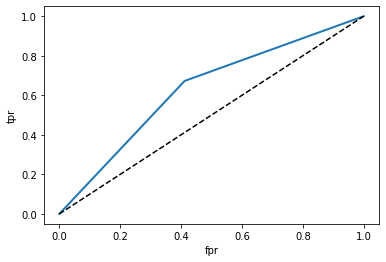

[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=20, subsample=0.9;, score=0.649 total time=   2.3s
[CV 3/5] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=20, subsample=0.9;, score=0.545 total time=   3.0s
[CV 4/5] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=20, subsample=0.9;, score=0.731 total time=   8.5s
[CV 1/5] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=20, subsample=0.8;, score=0.687 total time=  17.3s
[CV 3/5] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=20, subsample=0.8;, score=0.455 total time=   1.1s
[CV 4/5] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=20, subsample=0.8;, score=0.731 total time=  17.3s
[CV 3/5] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=20, subsample=0.7;, score=0.507 total time=  24.3s
[CV 2/5] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=20,

In [216]:
fpr_xgb_c, tpr_xgb_c, thresholds_xgb_c = roc_curve(test_y, pred_y_xgb_c)
auc_xgb_c = roc_auc_score(test_y, pred_y_xgb_c)
plt.plot(fpr_xgb_c, tpr_xgb_c, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc_xgb_c}')

### 결과
1. 정확도:0.61, 정밀도:0.40, 재현율:0.67, auc:0.63
2. 추가적인 성능향상이 이뤄지지는 않았다.

# 회고
1. 주가(코인) 데이터 labeling 단계부터 차분히 코드와 의미를 이해하는 과정을 거쳤다.
2. Trend scanning 방법에서 회귀계수의 절댓값이 가장 큰 시점에 대하여 추세를 확인하고, labeling 까지 하는 점에서 그 동안 가격 데이터를 어떻게 분류하는지에 대한 질문에 인사이트를 얻을 수 있었다.
3. 여러 지표들이 있었는데 당장 모든 지표를 이해할 수는 없었다. 전체적은 프로세스부터 공부하다보면 세부적인 지표도 자연스럽게 익히게 될 것 같다.
4. ARIMA 분석과 더불어 가격 예측 과정을 한번 경험해본 것이 앞으로 금융데이터를 공부하는데 좋은 발판이 될 것 같다.
5. 그리드서치를 하면서 성능향상을 위해 여러 시도를 해보았다. 계산시간이 너무 많이 들어서 더 적극적인 시도를 하지 못한 것 같다. 경과를 확인하고 시간을 단축하는 힌트를 얻고자 verbose=4 설정하여 경과를 살펴보았다.
6. 당장 세부적이게 이해하는데 한계가 있었다. 그럼에도 불구하고, 할 수 있는 만큼 최대한 이해하고자 노력하다보니 labeling 부분은 어느 정도 그 원리를 이해할 수 있었다.
7. feature의 상대적 중요성을 파악하고, 피쳐를 선별적으로 선택하여 모델을 학습했으면 어땠을까 하는 질문이 있다. 시간이 너무 늦어서 추후 시도해 보아야 할 것 같다. 
8. 성능향상을 놓고 더 생각하고 공부해야 할 것 같다.